# 4 - De centrale limietstelling

In dit bestand je voorbeelden van hoe je in Python omgaat met de begrippen uit het hoofdstuk De Centrale Limietstelling uit de cursus. Meer bepaald:

- plotten van een normale verdeling
- plotten van een histogram van een steekproef met de theoretische kansverdeling
- kansen berekenen in de normale verdeling
- betrouwbaarheidsintervallen berekenen

In [45]:
# Importeren van de nodige packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basis visualisatie
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram
import seaborn as sns                               # Geavanceerde datavisualisatie
import altair as alt                                # Een alternatief visualisatiesysteem

## De normale verdeling

### Plot van de normale verdeling

Specifiek kan je voor de standaardnormale verdeling $Z \sim Nor(\mu = 0, \sigma = 1)$ als volgt te werk gaan:

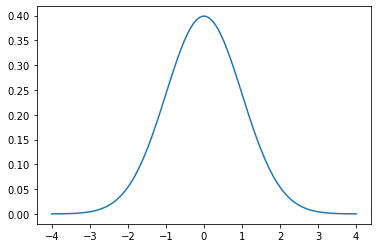

In [47]:
x = np.linspace(-4, +4, num=100)
plt.plot(x, stats.norm.pdf(x, 0, 1))

We kunnen deze code veralgemenen voor een normale verdeling. Als voorbeeld nemen we $X \sim Nor(\mu = 5, \sigma = 1.5)$. Alle "interessante" punten op de Gausscurve liggen op max. 4 standaardafwijkingen links of rechts van het gemiddelde. We gaan onze x-waarden dan ook zo berekenen. De `pdf()`-functie laat toe om gemiddelde en standaardafwijking ook op te geven.

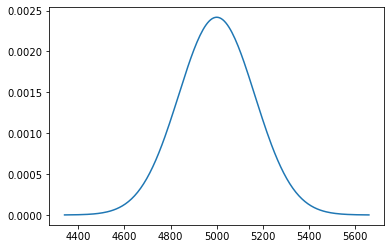

In [48]:
m = 5000    # Gemiddelde
s = 165     # Standaardafwijking
x = np.linspace(m - 4 * s, m + 4 * s, num=201)
plt.plot(x, stats.norm.pdf(x, m, s))


De *vorm* van deze grafiek is volledig dezelfde als die van de *standaard*normaalverdeling, enkel de schaal (zowel op de x- als de y-as) is anders.

### Histogram met dichtheidsfunctie

Het volgende voorbeeldje toont hoe je een histogram kan tekenen van normaal verdeelde data en de plot van de "theoretische" dichtheidsfunctie.

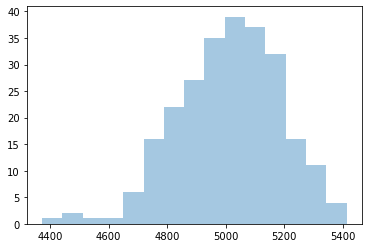

In [49]:
# Genereer 10000 willekeurige normaal verdeelde getallen
n = 250
observaties = np.random.normal(loc=m, scale=s, size=n)

# Teken histogram (Seaborn), zonder dichtheidsfunctie
obs_hist = sns.distplot(a = observaties, hist=True, kde=False)


Als je op bovenstaand histogram een Gauss-curve zou plotten, dan zal je niet veel zien. De schaal op de y-as voor de Gauss-curve is immers veel kleiner dan die van het histogram (zie bovenstaande plot van een normale verdeling).

We kunnen ook een histogram tekenen met *densiteiten*. In dit geval is de *oppervlakte* van een staaf gelijk aan de *relatieve* frequentie van die klasse. (De *densiteit* of *dichtheid* is de *relatieve* frequentie gedeeld door de *breedte* van de klasse.) De som van alle oppervlaktes van alle balken is één. Dit komt overeen met de oppervlakte onder de Gauss-curve die is ook gelijk aan één. Het histogram en de Gausscurve kunnen dan dezelfde y-as gebruiken.

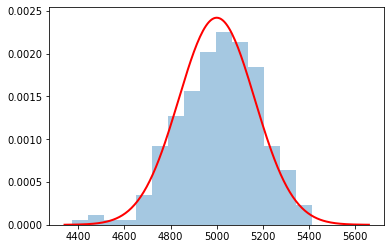

In [50]:
obs_hist = sns.distplot(a = observaties, norm_hist=True, kde=False) # histogram observaties
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)                 # X-as voor Gauss-curve
dist_y = stats.norm.pdf(dist_x, m, s)                               # Y-waarden

obs_hist.plot(dist_x, dist_y, 'red', lw=2) # Plot de Gauss-curve bovenop het histogram

## Kansverdeling in de normale verdeling

Stel, Superman heeft een reactiesnelheid die normaal verdeeld is met gemiddelde 5 ms en standaardafwijking 1.5 ms.

In [51]:
m = 5
s = 1.5

Wat is de kans dat zijn reactiesnelheid groter is dan 6.5 ms? Wiskundige notatie: $P(X > 6.5)$


In [52]:
# We berekenen eerst de z-score:
x = 6.5
z = (x - m) / s
z

1.0

In Python kan je de SciPy-functie `norm.cdf()` om de *linker*staartkans $P(X < x)$ of $P(Z < z)$ te berekenen. Om de *rechterstaartkans* te berekenen gebruiken we de functie `norm.sf()` (gedefinieerd als `1 - cdf`, ook de *survival function* genoemd, vandaar de functienaam)

In [53]:
stats.norm.sf(z)

0.15865525393145707

We kunnen ook meteen gemiddelde en standaardafwijking meegeven aan `cdf()`:

In [54]:
stats.norm.sf(x, loc=m, scale=s)

0.15865525393145707

Een grafische voorstelling van deze situatie:

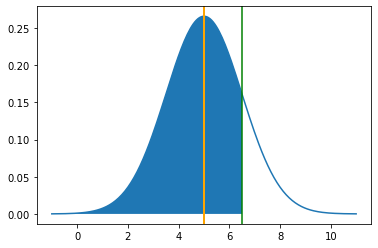

In [55]:
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)     # X-waarden
dist_y = stats.norm.pdf(dist_x, m, s)                   # Y-waarden voor de Gauss-curve
plt.plot(dist_x, dist_y)                                # Plot de Gauss-curve
plt.axvline(m, color="orange", lw=2)                    # Toon het gemiddelde met een oranje lijn
plt.axvline(x, color="green")                           # Toon x met een groene lijn
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x)  # Kleur het gebied links van x in

De linkerstaartkans is het donkerblauw gekleurde gebied op deze grafiek.

### Andere voorbeelden van kansberekening

Hoe groot is de kans dat de reactiesnelheid van Superman:

1. minder dan 4 ms is?
2. meer dan 7 ms is?
3. minder dan 3 ms is?
4. tussen 2 en 6,5 ms ligt?

In [56]:
print("1. P(X < 4) ~= %.3f" % stats.norm.cdf(4, loc=m, scale=s))
print("2. P(X > 7) ~= %.3f" % stats.norm.sf(7, loc=m, scale=s))
print("3. P(X < 3) ~= %.3f" % stats.norm.cdf(3, loc=m, scale=s))
print("4. P(2 < X < 6.5) ~= %.3f" % (stats.norm.cdf(6.5, loc=m, scale=s) - 
                                  stats.norm.cdf(2, loc=m, scale=s)))

1. P(X < 4) ~= 0.252
2. P(X > 7) ~= 0.091
3. P(X < 3) ~= 0.091
4. P(2 < X < 6.5) ~= 0.819


En onder welke reactietijd ligt 80% van de waarden?

Hiervoor zouden we de inverse functie van `cdf()` nodig hebben. Die bestaat echter niet in SciPy. We hebben wél de inverse functie van `sf()` en die heet `isf()`. We vinden het resultaat door uit te rekenen boven welke reactietijd 20% van de waarden ligt, wat op hetzelfde neer komt:

In [57]:
print("P(X < %.4f) ≃ 0.8" % stats.norm.isf((1-.8), loc=m, scale=s))

P(X < 6.2624) ≃ 0.8


## Betrouwbaarheidsintervallen

Een betrouwbaarheidsinterval is een schatting aan de hand van een gebied waarbinnen je met een gekozen betrouwbaarheid kan veronderstellen dat het onbekende populatiegemiddelde erbinnen zal liggen.

Stel, we hebben *n* = 100 metingen gedaan van de reactiesnelheid van Superman en we bekomen een steekproefgemiddelde van 5.2 ms. We veronderstellen dat we de werkelijke standaardafwijking van zijn reactiesnelheid kennen en dat die 1.5 ms is.

Om een betrouwbaarheidsinterval te bepalen gaan we als volgt te werk:

1. We nemen als initiële schatting het steekproefgemiddelde en kiezen een zekerheidsniveau, bv. $1 - \alpha = 0.95$ (of 95%).
2. We zoeken vervolgens de $z$-score waartussen 95% van alle waarden liggen bij een standaardnormale verdeling.
3. Die gebruiken we om de waarden links en rechts van het steekproefgemiddelde te bepalen waartussen we verwachten dat 95% van de waarden terecht komen voor de kansverdeling die we uit de *centrale limietstelling* halen.

In [58]:
# Stap 1.
m = 5.2      # Steekproefgemiddelde
s = 1.5      # Standaardafwijking van de populatie
n = 100      # Steekproefgrootte
alpha = .05  # 1 - alpha is het zekerheidsniveau

# Stap 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Stap 3.
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Betrouwbaarheidsinterval: [%.4f, %.4f]" % (lo, hi))

z-score: 1.95996
Betrouwbaarheidsinterval: [4.9060, 5.4940]


We stellen dus met een betrouwbaarheidsniveau van 95% dat de reactiesnelheid van de superhelden ligt tussen de 4.91 en 5.49 ms ligt.

## Betrouwbaarheidsinterval bij kleine steekproeven

Wanneer we een kleine steekproef hebben (kleiner dan 30) valt de veronderstelling die we in de centrale limietstelling gedaan hebben weg. We kunnen in dat geval ook de normale verdeling niet gebruiken.

Via de zgn. Student-$t$-verdeling is er echter toch een manier om een betrouwbaarheidsinterval te construeren. Deze verdeling lijkt op de normale verdeling in die zin dat ze ook op een Gauss-curve lijkt. De Student-$t$-verdeling houdt echter rekening met de steekproefgrootte $n$ en moet je ook mee opgeven. De dichtheidsfunctie krijgt dan een extra parameter die het aantal *vrijheidsgraden* genoemd wordt (Eng. *degrees of freedom*, afgekort `df`) en gelijk is aan $n - 1$.

Hoe kleiner het aantal vrijheidsgraden, hoe "platter" de curve en hoe breder de bekomen betrouwbaarheidsintervallen zullen zijn. Dit modelleert de grotere onzekerheid die we krijgen omwille van de kleine steekproef. Hoe groter $n$, hoe dichter de curve die van de normaalverdeling zal benaderen.

In de grafiek hieronder vind je de dichtheidsfunctie voor de Student-$t$-verdeling voor verschillende vrijheidsgraden:


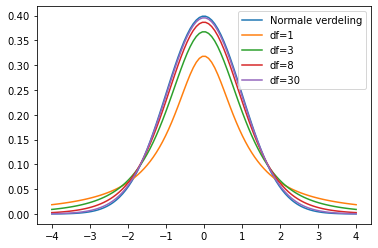

In [59]:
x = np.linspace(-4, +4, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.plot(x, stats.norm.pdf(x, 0, 1), label="Normale verdeling") # Normale verdeling
tplot.plot(x, stats.t.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.t.pdf(x, 3), label="df=3")
tplot.plot(x, stats.t.pdf(x, 8), label="df=8")
tplot.plot(x, stats.t.pdf(x, 30), label="df=30")
tplot.legend(loc='best')

Om dit te illustreren nemen we hetzelfde voorbeeld van hierboven, maar veronderstellen dat de steekproefgrootte slechts 15 was.

In [60]:
# Stap 1.
m = 5.2      # Steekproefgemiddelde
s = 1.5      # Standaardafwijking van de populatie
n = 15       # Steekproefgrootte
alpha = .05  # 1 - alpha is het zekerheidsniveau

# Stap 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Stap 3.
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Betrouwbaarheidsinterval: [%.4f, %.4f]" % (lo, hi))

t-score: 2.14479
Betrouwbaarheidsinterval: [4.3693, 6.0307]



We stellen dus met een betrouwbaarheidsniveau van 95% dat de reactiesnelheid van de superhelden ligt tussen de 4.37 en 6.03 ms ligt.

Dit interval is een stuk breder dan wat we verkregen bij een grotere steekproef. We zijn dus minder zeker van de positie van het populatiegemiddelde.

## Betrouwbaarheidsinterval bij fracties

Sommige variabelen hebben slechts twee mogelijke waarden, bv. ja/nee, waar/vals, gelukt/mislukt, succes/falen, 1/0, enz. Aan de hand van de steekproef willen we schatten wat in werkelijkheid de verhouding is tussen deze twee uitkomsten over de gehele populatie.

Stel dat we willen weten welk percentage van de superhelden (op eigen kracht) kan vliegen. Er werden 100 superhelden ondervraagd, 6 daarvan konden demonstreren dat ze inderdaad kunnen vliegen. Construeer een 95%-betrouwbaarheidsinterval voor het verwachte percentage van vliegende superhelden in de gehele pupulatie.

In [61]:
# Stap 1
n = 100  # Steekproefgrootte, aantal waarnemingen
k = 6    # Aantal "successen" in de steekproef
a = 0.05 # Betrouwbaarheidsniveau 1-a = 0.95

p = k / n  # Percentage successen in de steekproef
q = 1 - p  # Percentage falingen in de steekproef

# Stap 2. We gebruiken opnieuw de normale verdeling, want we hebben een voldoende grote steekproef
z = stats.norm.isf(a/2)
print("z-score: %.5f" % z)

# Stap 3
lo = p - z * np.sqrt(p*q/n)
hi = p + z * np.sqrt(p*q/n)
print("Betrouwbaarheidsinterval: [%.5f, %.5f]" % (lo, hi))

z-score: 1.95996
Betrouwbaarheidsinterval: [0.01345, 0.10655]


We stellen dus met een betrouwbaarheidsniveau van 95% dat tussen de 1.3% en 10.6% van de superhelden kan vliegen.